In [24]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import norm, mannwhitneyu
from tqdm.auto import tqdm

plt.style.use('ggplot')

In [25]:
path = 'https://stepik.org/media/attachments/lesson/396008/hw_bootstrap.csv'

In [26]:
df = pd.read_csv(path, sep = ';')

In [27]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [28]:
df.head()

,value,experimentVariant
0,"10,3804953740268",Control
1,"9,54686666784264",Control
2,"11,0882146509904",Control
3,"10,1472740570122",Control
4,"9,78980767524929",Control


In [29]:
df['value'] = df.value.str.replace(',','.').astype(float)

In [30]:
df.experimentVariant.unique()

array(['Control', 'Treatment'], dtype=object)

In [31]:
control = df.query('experimentVariant == "Control"').value

In [50]:
control.head()

0    10.380495
1     9.546867
2    11.088215
3    10.147274
4     9.789808
Name: value, dtype: float64

In [33]:
test = df.query('experimentVariant == "Treatment"').value

In [51]:
test.head()

500    10.380495
501     9.546867
502    11.088215
503    10.147274
504     9.789808
Name: value, dtype: float64

In [35]:
#1 Примените бутстрап (с np.mean) и критерий mann-whitney, а потом сравните p-value

In [36]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

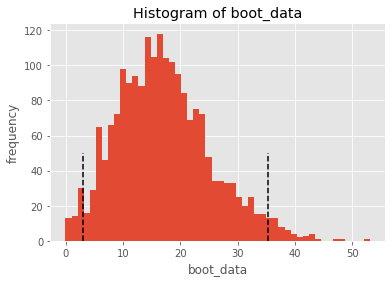

In [37]:
booted_data_mean = get_bootstrap(test, control, boot_it = 2000)

In [38]:
booted_data_mean["p_value"]

0.03637221097774978

In [39]:
booted_data_mean["ci"]

,0
0.025,3.029204
0.975,35.356566


In [40]:
#критерий mann-whitney
# compare samples
stat, p = mannwhitneyu(test, control)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=125810.500, p=0.859
Same distribution (fail to reject H0)


In [41]:
#2 Примените бутстрап (с np.median) и критерий mann-whitney, а потом сравните p-value.

In [42]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # median() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

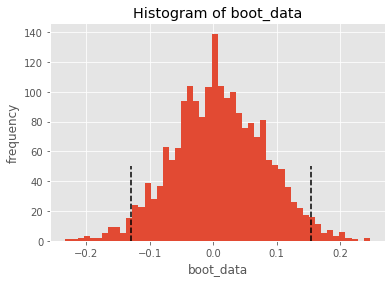

In [43]:
booted_data_median = get_bootstrap(test, control, boot_it = 2000)

In [44]:
booted_data_median["p_value"]

0.8988832174054329

In [45]:
booted_data_median["ci"]

,0
0.025,-0.129748
0.975,0.153694


In [23]:
# H0 говорит нам, что различий в тестовой и контрольной группах нет. Альтернативная - что различия есть. 

# При сравнении средних в двух группах p-value < 0.05, и 0 в доверительный интервал не попадает. 
# Соответственно, нулевая гипотеза на заданном уровне значимости не принимается, и мы можем говорить, о статистическоь
# различии в средних в двух группах.

# Обратная картина наблюдается при сравнении медиан в двух группах: p-value  > 0.05, 
# и 0 в доверительный интервал попадает.Соответственно, нулевая гипотеза на заданном уровне значимости принимается, 
# и мы можем говорить, что различий в тестовой и контрольной группах нет. 
# Тоже нам говорит критерий mann-whitney (p=0.859).

In [ ]:
#Видимо, в данных есть выбросы, которые перетягивают среднее на себя. 
# Их видно на гистограмме тестовой группы.

# Поэтому сранение групп будет проводить по медиане. Выводы по медиане описаны выше.

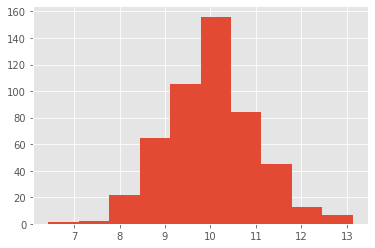

In [48]:
control.hist()

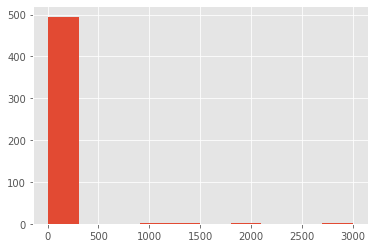

In [49]:
test.hist()